### Imports

In [1]:
import sqlite3 as sql
import pandas as pd
import torch.nn as nn
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import OneHotEncoder
import tqdm
import random
import matplotlib.pyplot as plt
from models import *
from utils import *
from analysis import *

### Model Loading

In [4]:
import pickle
# Load the model from the file
with open('models/model_combined_2000epoch.pkl', 'rb') as f:
    model, loss_data= pickle.load(f)

### Analysis

Sample Outputs:
Unemployment=7.5, State=WI, Industry=Health Care and Social Assistance => Survival Prediction=91.7554
Unemployment=5.4, State=VT, Industry=Health Care and Social Assistance => Survival Prediction=87.5697
Unemployment=7.8, State=WY, Industry=Educational Services => Survival Prediction=85.9106


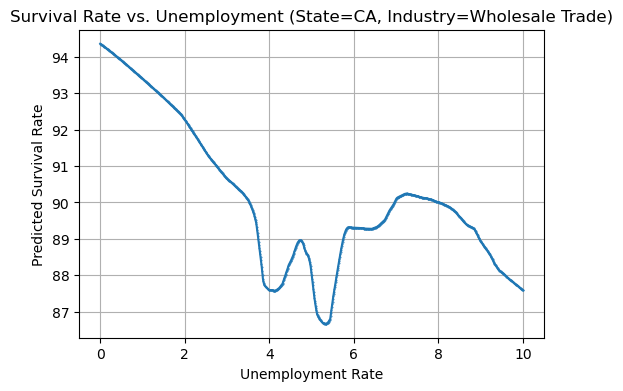

In [5]:
analyze_survival_rate(model, 5, 5)

#### Example Use: Choosing a given unemployment and industry, we get prediction values for each state:

In [45]:
industry_code = random.choice(naics_codes)
unemployment_rate = round(random.uniform(3.0, 10.0), 2)
print(f"Predictions for industry: {industry_dict_abbrev[industry_code]} and Unemployment Rate: {unemployment_rate}%")
df_predictions = generate_state_predictions(model, unemployment_rate, int(industry_code))
print(df_predictions.head(10))

Predictions for industry: Mining, Quarrying, and Oil and Gas Extraction and Unemployment Rate: 8.44%
  State  Prediction
0    AL   89.719345
1    AK   89.753082
2    AZ   87.285820
3    AR   88.651451
4    CA   86.420784
5    CO   87.714851
6    CT   90.035545
7    DE   84.606300
8    DC   86.638634
9    FL   87.624466


In [15]:
industry_encoder.transform([[1]]).shape

(1, 19)